In [1]:
import logging
import os
import sys
import gym
import matplotlib.pyplot as plt
from gym.envs.mujoco.humanoid import HumanoidEnv

In [2]:
#Relative import trick
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.init_qpos_modifer import InitQposModifierFactory, InitQposModifier

In [4]:
FORMAT = '%(asctime)s: %(message)s'
logging.basicConfig(format=FORMAT, stream=sys.stdout, level=logging.INFO)

In [5]:
class ParametrizableResetHumanoid(HumanoidEnv):
    def __init__(self):
        super().__init__()

        qpos_modifier = InitQposModifierFactory.get_default()
        logging.info(f"Modifying Humanoid init_qpot using {qpos_modifier}")
        self.init_qpos = qpos_modifier.modify_init_qpos(self.init_qpos)

In [6]:
class NewInitQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 7
        value = 0.5
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [7]:
class ForwardTiltQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 5
        value = 0.1 # slight forward tilt
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [8]:
class XAxisTiltQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 6
        value = 0.1 # slight tilt to the right in relation to x-axis
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [9]:
class LegsRotationQposModifier(InitQposModifier):
    def modify_init_qpos(self, init_qpos):
        index = 7
        value = 0.1 # slight legs rotation to the right
        
        init_qpos[index] = value  # default is 0
        logging.info(f"init_qpos[{index}] = {value}")
        return init_qpos

In [10]:
new_env_name = 'ParametrizableResetHumanoid-v2'

gym.envs.register(
    id=new_env_name,
    entry_point=ParametrizableResetHumanoid,
    max_episode_steps=1000,
)
logging.info(f"Registered new environment: {new_env_name}")

2022-04-04 09:46:26,607: Registered new environment: ParametrizableResetHumanoid-v2


In [11]:
name_of_InitQposModifier = "new_modifier"
InitQposModifierFactory.register(name_of_InitQposModifier, NewInitQposModifier)

In [12]:
forward_tilt_InitQposModifier = "forward_tilt"
InitQposModifierFactory.register(forward_tilt_InitQposModifier, ForwardTiltQposModifier)

In [13]:
x_axis_InitQposModifier = "x_axis_rotation"
InitQposModifierFactory.register(x_axis_InitQposModifier, XAxisTiltQposModifier)

In [14]:
legs_roatation_InitQposModifier = "legs_rotation"
InitQposModifierFactory.register(legs_roatation_InitQposModifier, LegsRotationQposModifier)

In [15]:
used_InitQposModifier = forward_tilt_InitQposModifier # Change this variable to change used InitQposModifier

os.environ["DEFAULT_InitQposModifier"] = used_InitQposModifier
logging.info(f"Set env variable DEFAULT_InitQposModifier={used_InitQposModifier}")

2022-04-04 09:46:26,629: Set env variable DEFAULT_InitQposModifier=forward_tilt


2022-04-04 09:46:26,643: Modifying Humanoid init_qpot using <__main__.ForwardTiltQposModifier object at 0x7fd3de3c7550>
2022-04-04 09:46:26,643: init_qpos[5] = 0.1


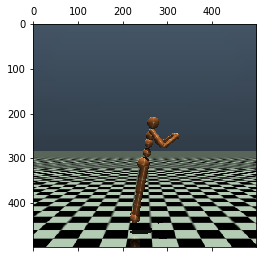

In [16]:
env = gym.make(new_env_name)
observation = env.reset()

first_frame = env.render(mode='rgb_array')
        
env.close()
plt.matshow(first_frame)